<a href="https://colab.research.google.com/github/pinak139/hello-world/blob/main/lead_time_analysis_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm



lead_time = pd.read_csv('Lead_Time_Forecasting.csv')

lead_time_sku = lead_time[['ixSKU','ActualLeadTime']]
lead_time_ven = lead_time[['ixVendor','ActualLeadTime']]



def poisson_mean(row):
    arr = np.random.poisson(row[1],1000)
    return np.mean(arr)

def poisson_median(row):
    arr = np.random.poisson(row[1],1000)
    return np.median(arr)

def poisson_90(row):
    arr = np.random.poisson(row[1],1000)
    return np.percentile(arr,90)

def tri_mean(row):
    if row[1] == row[3]:
        arr = np.random.triangular(row[2],row[1],row[3]+1,1000)
    else:
        arr = np.random.triangular(row[2],row[1],row[3]+1,1000)

    return np.mean(arr)

def tri_median(row):
    if row[1] == row[3]:
        arr = np.random.triangular(row[2],row[1],row[3]+1,1000)
    else:
        arr = np.random.triangular(row[2],row[1],row[3]+1,1000)
    return np.median(arr)


def tri_90(row):
    if row[1] == row[3]:
        arr = np.random.triangular(row[2],row[1],row[3]+1,1000)
    else:
        arr = np.random.triangular(row[2],row[1],row[3]+1,1000)
    return np.percentile(arr,90)


# Comnputing SKU Lead Time Estimates

lt_med_sku = lead_time_sku.groupby(['ixSKU']).median().reset_index()
lt_mean_sku = lead_time_sku.groupby(['ixSKU']).mean().reset_index()
lt_min_sku= lead_time_sku.groupby(['ixSKU']).min().reset_index()
lt_max_sku = lead_time_sku.groupby(['ixSKU']).max().reset_index()
lt_count_sku = lead_time_sku.groupby(['ixSKU']).count().reset_index()

# Comnputing SKU Lead Time Estimates

lt_med_ven = lead_time_ven.groupby(['ixVendor']).median().reset_index()
lt_mean_ven = lead_time_ven.groupby(['ixVendor']).mean().reset_index()
lt_min_ven= lead_time_ven.groupby(['ixVendor']).min().reset_index()
lt_max_ven = lead_time_ven.groupby(['ixVendor']).max().reset_index()
lt_count_ven = lead_time_ven.groupby(['ixVendor']).count().reset_index()



lt_sku = pd.merge(lt_med_sku,lt_min_sku, on = 'ixSKU', how = 'left')
lt_sku = pd.merge(lt_sku,lt_max_sku, on = 'ixSKU', how = 'left')
lt_sku = lt_sku.rename(columns = {'ActualLeadTime_x' : 'mean','ActualLeadTime_y' : 'min','ActualLeadTime' : 'max' })
lt_sku = pd.merge(lt_sku,lt_count_sku, on = 'ixSKU', how = 'left')
lt_sku = lt_sku.rename(columns = {'ActualLeadTime' : 'count' })

lt_ven = pd.merge(lt_med_ven,lt_min_ven, on = 'ixVendor', how = 'left')
lt_ven = pd.merge(lt_ven,lt_max_ven, on = 'ixVendor', how = 'left')
lt_ven = lt_ven.rename(columns = {'ActualLeadTime_x' : 'mean','ActualLeadTime_y' : 'min','ActualLeadTime' : 'max' })
lt_ven = pd.merge(lt_ven,lt_count_ven, on = 'ixVendor', how = 'left')
lt_ven = lt_ven.rename(columns = {'ActualLeadTime' : 'count' })

lt_sku['poisson_mean_sku'] = lt_sku.apply(poisson_mean,axis = 1)
lt_sku['poisson_median_sku'] = lt_sku.apply(poisson_median,axis = 1)
lt_sku['poisson_90_sku'] = lt_sku.apply(poisson_90,axis = 1)
lt_sku['tri_mean_sku'] = lt_sku.apply(tri_mean,axis = 1)
lt_sku['tri_median_sku'] = lt_sku.apply(tri_median,axis = 1)
lt_sku['tri_90_sku'] = lt_sku.apply(tri_90,axis = 1)

lt_ven['poisson_mean_ven'] = lt_ven.apply(poisson_mean,axis = 1)
lt_ven['poisson_median_ven'] = lt_ven.apply(poisson_median,axis = 1)
lt_ven['poisson_90_ven'] = lt_ven.apply(poisson_90,axis = 1)
lt_ven['tri_mean_ven'] = lt_ven.apply(tri_mean,axis = 1)
lt_ven['tri_median_ven'] = lt_ven.apply(tri_median,axis = 1)
lt_ven['tri_90_ven'] = lt_ven.apply(tri_90,axis = 1)

stats = lead_time[['ixPO','ixVendor','ixSKU','iMonth','iPeriodYear','ExpectedLeadTime','ActualLeadTime','iMonth','iPeriodYear']]
stats = pd.merge(stats,lt_sku, on = 'ixSKU', how = 'left')
stats = pd.merge(stats,lt_ven, on = 'ixVendor', how = 'left')

print (stats.head())



FileNotFoundError: ignored

In [ ]:
stats = stats.dropna()

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,PoissonRegressor,GammaRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

def trainModels(X_train,y_train):
  lr = LinearRegression()
  lr.fit(X_train,y_train)
  y_pred_lr = list(lr.predict(X_test))
  lasso = Lasso(alpha = 1.0)
  lasso.fit(X_train,y_train)
  y_pred_lasso = list(lasso.predict(X_test))
  ridge = Ridge(alpha = 0.1)
  forest = RandomForestRegressor(n_estimators = 100,criterion = 'squared_error',random_state = 1, n_jobs = -1)
  ada = AdaBoostRegressor(n_estimators = 100,random_state = 1)
  hgb = HistGradientBoostingRegressor(random_state = 1)







In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [ ]:
y_train

array([41., 51.,  1., ...,  5.,  7., 10.])

In [ ]:
from mlxtend.plotting import scatterplotmatrix,heatmap
cols_x = ['iMonth', 'iPeriodYear',
       'ExpectedLeadTime',  'iMonth', 'iPeriodYear', 'mean_x',
       'min_x', 'max_x', 'count_x', 'poisson_mean_sku', 'poisson_median_sku',
       'poisson_90_sku', 'tri_mean_sku', 'tri_median_sku', 'tri_90_sku',
       'mean_y', 'min_y', 'max_y', 'count_y', 'poisson_mean_ven',
       'poisson_median_ven', 'poisson_90_ven', 'tri_mean_ven',
       'tri_median_ven', 'tri_90_ven']

In [ ]:
#cols_x = cols.remove('ActualLeadTime')
X = stats[cols_x].values
y = stats['ActualLeadTime'].values

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr = list(lr.predict(X_test))
y_pred_xgb = list(xgb.predict(X_test))
y_pred_lgb = list(lgb.predict(X_test))
y_pred_lasso = list(lasso.predict(X_test))

In [ ]:
y_test = list(y_test)

In [ ]:
mean_absolute_percentage_error(y_pred,y_test)
#r2_score(y_pred,y_test)

3.5611046228288776

In [ ]:
y_test['pred'] = y_pred

IndexError: ignored

In [ ]:
stats.head()

,ixPO,ixVendor,ixSKU,iMonth,iPeriodYear,ExpectedLeadTime,ActualLeadTime,iMonth,iPeriodYear,mean_x,...,min_y,max_y,count_y,poisson_mean_ven,poisson_median_ven,poisson_90_ven,tri_mean_ven,tri_median_ven,tri_90_ven,pred
0,154750,611,6118178X,1.0,2021.0,336.0,322.0,1.0,2021.0,12.0,...,2.0,473.0,16,39.329,39.0,47.0,168.850554,150.933368,335.770035,196.648534
1,157682,2517,91054711,5.0,2021.0,57.0,53.0,5.0,2021.0,53.0,...,2.0,307.0,1383,25.886,26.0,33.0,107.307017,101.990927,216.204933,67.052759
2,157682,2517,91054716,5.0,2021.0,57.0,53.0,5.0,2021.0,54.5,...,2.0,307.0,1383,25.886,26.0,33.0,107.307017,101.990927,216.204933,69.448948
3,157682,2517,91054718-RED-L,5.0,2021.0,57.0,53.0,5.0,2021.0,66.5,...,2.0,307.0,1383,25.886,26.0,33.0,107.307017,101.990927,216.204933,76.432772
4,157682,2517,91054718-RED-R,5.0,2021.0,57.0,53.0,5.0,2021.0,66.5,...,2.0,307.0,1383,25.886,26.0,33.0,107.307017,101.990927,216.204933,76.333047


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0)
lasso.fit(X_train,y_train)
#y_pred_lasso = lasso.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.479e+07, tolerance: 7.510e+04
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
stats['pred_lasso'] = y_pred_lasso

In [ ]:
stats.head()

,ixPO,ixVendor,ixSKU,iMonth,iPeriodYear,ExpectedLeadTime,ActualLeadTime,iMonth,iPeriodYear,mean_x,...,poisson_90_ven,tri_mean_ven,tri_median_ven,tri_90_ven,pred,pred_lasso,pred_ada,pred_hgb,pred_xgb,pored_lgb
0,154750,611,6118178X,1.0,2021.0,336.0,322.0,1.0,2021.0,12.0,...,47.0,168.850554,150.933368,335.770035,196.648534,192.155178,215.743520,309.543169,322.575958,316.942262
1,157682,2517,91054711,5.0,2021.0,57.0,53.0,5.0,2021.0,53.0,...,33.0,107.307017,101.990927,216.204933,67.052759,63.295717,69.215702,67.911674,63.326317,67.671814
2,157682,2517,91054716,5.0,2021.0,57.0,53.0,5.0,2021.0,54.5,...,33.0,107.307017,101.990927,216.204933,69.448948,65.600129,69.215702,64.542238,58.651817,66.760290
3,157682,2517,91054718-RED-L,5.0,2021.0,57.0,53.0,5.0,2021.0,66.5,...,33.0,107.307017,101.990927,216.204933,76.432772,72.784824,74.568695,69.102752,68.789261,68.594641
4,157682,2517,91054718-RED-R,5.0,2021.0,57.0,53.0,5.0,2021.0,66.5,...,33.0,107.307017,101.990927,216.204933,76.333047,72.787038,74.568695,67.681297,68.789261,68.594641


In [ ]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error
forest = RandomForestRegressor(n_estimators = 100,criterion = 'squared_error',random_state = 1, n_jobs = -1)
ada = AdaBoostRegressor(n_estimators = 100,random_state = 1)
hgb = HistGradientBoostingRegressor(random_state = 1)
xgb = XGBRegressor()
lgb = LGBMRegressor()

#y_pred_rf = forest.predict(X)

In [ ]:
lgb.fit(X,y)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4805
[LightGBM] [Info] Number of data points in the train set: 154318, number of used features: 29
[LightGBM] [Info] Start training from score 53.098161


LGBMRegressor()

In [ ]:
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
hgb.fit(X,y)

HistGradientBoostingRegressor(random_state=1)

In [ ]:
ada.fit(X,y)

AdaBoostRegressor(n_estimators=100, random_state=1)

In [ ]:
forest.fit(X,y)

KeyboardInterrupt: ignored

In [ ]:
y_pred_ada = ada.predict(X)

In [ ]:
y_lgb = lgb.predict(X)

In [ ]:
y_hgb = hgb.predict(X)

In [ ]:
y_xgb = xgb.predict(X)

In [ ]:
stats['pred_ada'] = y_pred_ada

In [ ]:
stats['pred_hgb'] = y_hgb

In [ ]:
stats['pred_xgb'] = y_xgb

In [ ]:
stats['pored_lgb'] = y_lgb

In [ ]:
lbg_e = mean_squared_error(stats[])

Index(['ixPO', 'ixVendor', 'ixSKU', 'iMonth', 'iPeriodYear',
       'ExpectedLeadTime', 'ActualLeadTime', 'iMonth', 'iPeriodYear', 'mean_x',
       'min_x', 'max_x', 'count_x', 'poisson_mean_sku', 'poisson_median_sku',
       'poisson_90_sku', 'tri_mean_sku', 'tri_median_sku', 'tri_90_sku',
       'mean_y', 'min_y', 'max_y', 'count_y', 'poisson_mean_ven',
       'poisson_median_ven', 'poisson_90_ven', 'tri_mean_ven',
       'tri_median_ven', 'tri_90_ven'],
      dtype='object')

In [ ]:
X = stats.drop(['ixPO','ixVendor','ixSKU','ActualLeadTime'], axis = 1)

In [ ]:
stats.to_csv('multi_model_preds.csv')

In [ ]:
X

array([[1.00000000e+00, 2.02100000e+03, 3.36000000e+02, ...,
        1.69872144e+02, 1.51366788e+02, 3.29012204e+02],
       [5.00000000e+00, 2.02100000e+03, 5.70000000e+01, ...,
        1.11719247e+02, 1.04201576e+02, 2.19670143e+02],
       [5.00000000e+00, 2.02100000e+03, 5.70000000e+01, ...,
        1.11719247e+02, 1.04201576e+02, 2.19670143e+02],
       ...,
       [4.00000000e+00, 2.02300000e+03, 1.00000000e+00, ...,
        7.06009031e+00, 5.62427091e+00, 1.43483663e+01],
       [4.00000000e+00, 2.02300000e+03, 1.00000000e+00, ...,
        7.06009031e+00, 5.62427091e+00, 1.43483663e+01],
       [4.00000000e+00, 2.02300000e+03, 1.00000000e+00, ...,
        7.06009031e+00, 5.62427091e+00, 1.43483663e+01]])

<ipython-input-10-d5023aac592d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1 = sns.distplot(stats["ActualLeadTime"], color="b", label="Skewness : %.1f"%(stats["ActualLeadTime"].skew()))


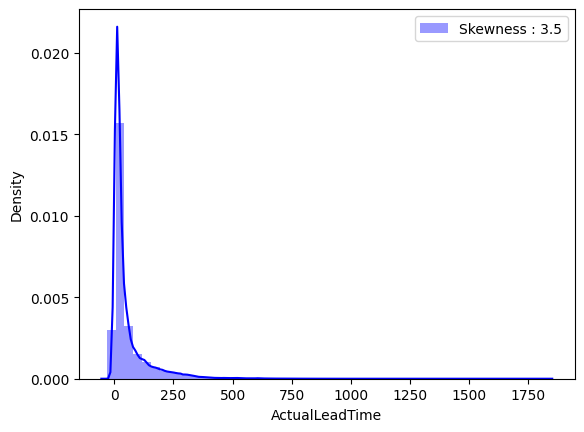

In [ ]:
plot1 = sns.distplot(stats["ActualLeadTime"], color="b", label="Skewness : %.1f"%(stats["ActualLeadTime"].skew()))
plot1 = plot1.legend(loc="best")

In [ ]:
stats["LogLeadTime"] = stats["ActualLeadTime"].map(lambda i: np.log(i) if i > 0 else 0)

<ipython-input-39-74dca258ae46>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2 = sns.distplot(stats["LogLeadTime"], color="b", label="Skewness : %.1f"%(stats["LogLeadTime"].skew()))


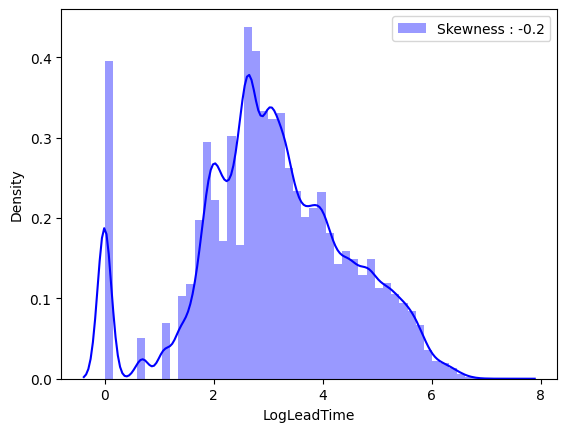

In [ ]:
plot2 = sns.distplot(stats["LogLeadTime"], color="b", label="Skewness : %.1f"%(stats["LogLeadTime"].skew()))
plot2 = plot2.legend(loc="best")


In [ ]:
stats.head()

,ixPO,ixVendor,ixSKU,sFreightTerms,iMonth,iPeriodYear,ExpectedLeadTime,ActualLeadTime,mean_x,min_x,...,mean_y,min_y,max_y,count_y,poisson_mean_ven,poisson_median_ven,poisson_90_ven,tri_mean_ven,tri_median_ven,tri_90_ven
0,154750,611,6118178X,COLLECT FREIGHT: FOB,1.0,2021.0,336.0,322.0,12.0,2.0,...,39.5,2.0,473.0,16,39.327,40.0,48.0,171.960419,158.994320,324.083330
1,157682,2517,91054711,COLLECT FREIGHT: FOB,5.0,2021.0,57.0,53.0,53.0,20.0,...,26.0,2.0,307.0,1383,26.236,26.0,33.0,116.453938,99.772368,223.796626
2,157682,2517,91054716,COLLECT FREIGHT: FOB,5.0,2021.0,57.0,53.0,54.5,53.0,...,26.0,2.0,307.0,1383,26.236,26.0,33.0,116.453938,99.772368,223.796626
3,157682,2517,91054718-RED-L,COLLECT FREIGHT: FOB,5.0,2021.0,57.0,53.0,66.5,53.0,...,26.0,2.0,307.0,1383,26.236,26.0,33.0,116.453938,99.772368,223.796626
4,157682,2517,91054718-RED-R,COLLECT FREIGHT: FOB,5.0,2021.0,57.0,53.0,66.5,53.0,...,26.0,2.0,307.0,1383,26.236,26.0,33.0,116.453938,99.772368,223.796626


In [ ]:
stats.columns
stats = stats.dropna()

In [ ]:
X = stats[['poisson_median_sku','poisson_90_sku','tri_median_sku','poisson_median_ven','tri_median_ven','ExpectedLeadTime']]
#X = X.dropna()
X = np.array(X)

In [ ]:
len(X)

154138

In [ ]:
y = stats['ActualLeadTime']

In [ ]:
y = np.array(y)

In [ ]:
len(y)

154138

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
print (model.score(X,y))

0.8137634620289335


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

ValueError: ignored

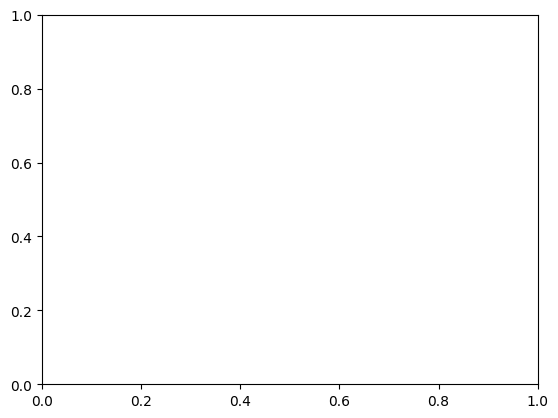

In [ ]:
plt.scatter(X, y, color ='b')

In [ ]:
y_pred = model.predict(X)

In [ ]:
y_pred
ypred = list(y_pred)

In [ ]:
y_error = y - y_pred
y_error = list(y_error)

In [ ]:
y = list(y)

In [ ]:
y = list(pd.Series(y).clip(lower = 0))

In [ ]:
len(ypred)

154138

In [ ]:
lt = pd.DataFrame(y,ypred).reset_index()

In [ ]:
lt['Actuals'] = lt[0]
lt['Pred'] = lt['index']

In [ ]:
lt = lt[['Actuals','Pred']]

In [ ]:
lt['Error'] = lt['Actuals']- lt['Pred']

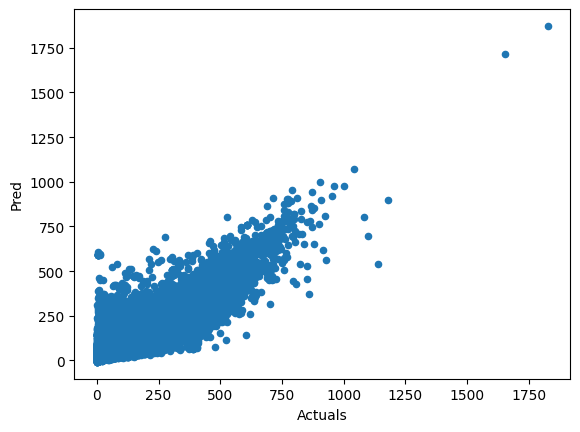

In [ ]:
ax1 = lt.plot.scatter(x = 'Actuals', y = 'Pred')

In [ ]:
lt.to_csv('lead_time_est.csv')

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
model = LinearRegression()
#statsin = stats.drop(['ixPO',,'ixVendor','ixSKU'],axis = 1)

In [ ]:
model.fit()

In [ ]:
stats['ixPO'] = stats['ixPO'].astype('category')
stats['ixVendor'] = stats['ixVendor'].astype('category')
stats['ixSKU'] = stats['ixSKU'].astype('category')

In [ ]:
stats['ixPO'] = stats['ixPO'].cat.codes
stats['ixVendor'] = stats['ixVendor'].cat.codes
stats['ixSKU'] = stats['ixSKU'].cat.codes

In [ ]:
enc = OneHotEncoder()

In [ ]:
enc_data = pd.DataFrame(enc.fit_transform(
    stats[['ixPO', 'ixVendor','ixSKU']]).toarray())

In [ ]:
stats1 = stats.join(enc_data)

In [ ]:
one_hot = pd.get_dummies(stats,columns = ['ixPO','ixVendor','ixSKU'])

KeyboardInterrupt: ignored

In [ ]:
stats1 = stats.drop(['ixPO','ixVendor','ixSKU','sFreightTerms'],axis = 1)

In [ ]:
lt.head(100)

,Actuals,Pred,Error
0,322.0,181.694873,140.305127
1,53.0,51.030436,1.969564
2,53.0,52.164118,0.835882
3,53.0,59.793469,-6.793469
4,53.0,59.640590,-6.640590
...,...,...,...
95,62.0,48.509369,13.490631
96,62.0,35.917037,26.082963
97,62.0,35.620064,26.379936
98,280.0,127.023637,152.976363


In [ ]:
stats1

In [ ]:
stats = lead_time[['ixPO','ixVendor','ixSKU','iMonth','iPeriodYear','count_x','count_y','mean_x','mean_y','min_x','min_y','max_x','max_y','poisson_mean_sku','poisson_median_sku','poisson_90_sku','tri_mean_sku','tri_median_sku','tri_90_sku',
                   'poisson_mean_ven','poisson_median_ven','poisson_90_ven','tri_mean_ven',]]

,ixPO,ixVendor,sShipToCSZ,sFreightTerms,POIssueDate,iISOWeek,iMonth,iPeriod,iYearMonth,iPeriodYear,...,iQuantityPosted,iQuantityReceivedPending,ixUnitofMeasurement,mCost,ixExpectedDeliveryDate,ixFirstReceivedDate,ExpectedPODate,FirstReceiptDate,ExpectedLeadTime,ActualLeadTime
0,154750,611,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,4.0,1.0,1.0,00:00.0,2021.0,...,25,0,ST,159.00,19724,19710,00:00.0,00:00.0,336.0,322.0
1,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,60,0,EA,56.00,19563,19559,00:00.0,00:00.0,57.0,53.0
2,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,10,0,EA,21.99,19563,19559,00:00.0,00:00.0,57.0,53.0
3,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,4,0,EA,36.00,19563,19559,00:00.0,00:00.0,57.0,53.0
4,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,4,0,EA,36.00,19563,19559,00:00.0,00:00.0,57.0,53.0


In [ ]:
lead_time = lead_time[['ixVendor','ixSKU','iMonth','iPeriodYear','poisson_mean_sku','poisson_median_sku','']]

,ixPO,ixVendor,sShipToCSZ,sFreightTerms,POIssueDate,iISOWeek,iMonth,iPeriod,iYearMonth,iPeriodYear,...,iQuantityPosted,iQuantityReceivedPending,ixUnitofMeasurement,mCost,ixExpectedDeliveryDate,ixFirstReceivedDate,ExpectedPODate,FirstReceiptDate,ExpectedLeadTime,ActualLeadTime
0,154750,611,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,4.0,1.0,1.0,00:00.0,2021.0,...,25,0,ST,159.00,19724,19710,00:00.0,00:00.0,336.0,322.0
1,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,60,0,EA,56.00,19563,19559,00:00.0,00:00.0,57.0,53.0
2,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,10,0,EA,21.99,19563,19559,00:00.0,00:00.0,57.0,53.0
3,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,4,0,EA,36.00,19563,19559,00:00.0,00:00.0,57.0,53.0
4,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,4,0,EA,36.00,19563,19559,00:00.0,00:00.0,57.0,53.0


In [ ]:
lead_time_sku = lead_time[['ixSKU','ActualLeadTime']]
lead_time_ven = lead_time[['ixVendor','ActualLeadTime']]

In [ ]:
lead_time.head()

,ixPO,ixVendor,sShipToCSZ,sFreightTerms,POIssueDate,iISOWeek,iMonth,iPeriod,iYearMonth,iPeriodYear,...,iQuantityPosted,iQuantityReceivedPending,ixUnitofMeasurement,mCost,ixExpectedDeliveryDate,ixFirstReceivedDate,ExpectedPODate,FirstReceiptDate,ExpectedLeadTime,ActualLeadTime
0,154750,611,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,4.0,1.0,1.0,00:00.0,2021.0,...,25,0,ST,159.00,19724,19710,00:00.0,00:00.0,336.0,322.0
1,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,60,0,EA,56.00,19563,19559,00:00.0,00:00.0,57.0,53.0
2,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,10,0,EA,21.99,19563,19559,00:00.0,00:00.0,57.0,53.0
3,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,4,0,EA,36.00,19563,19559,00:00.0,00:00.0,57.0,53.0
4,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,4,0,EA,36.00,19563,19559,00:00.0,00:00.0,57.0,53.0


In [ ]:
# Comnputing SKU Lead Time Estimates

lt_med_sku = lead_time_sku.groupby(['ixSKU']).median().reset_index()
lt_mean_sku = lead_time_sku.groupby(['ixSKU']).mean().reset_index()
lt_min_sku= lead_time_sku.groupby(['ixSKU']).min().reset_index()
lt_max_sku = lead_time_sku.groupby(['ixSKU']).max().reset_index()
lt_count_sku = lead_time_sku.groupby(['ixSKU']).count().reset_index()





In [ ]:
# Comnputing SKU Lead Time Estimates

lt_med_ven = lead_time_ven.groupby(['ixVendor']).median().reset_index()
lt_mean_ven = lead_time_ven.groupby(['ixVendor']).mean().reset_index()
lt_min_ven= lead_time_ven.groupby(['ixVendor']).min().reset_index()
lt_max_ven = lead_time_ven.groupby(['ixVendor']).max().reset_index()
lt_count_ven = lead_time_ven.groupby(['ixVendor']).count().reset_index()

In [ ]:
#lt_med['rn'] = np.random.poisson(lt_med['ActualLeadTime'])
lt_sku = pd.merge(lt_med_sku,lt_min_sku, on = 'ixSKU', how = 'left')
lt_sku = pd.merge(lt_sku,lt_max_sku, on = 'ixSKU', how = 'left')
lt_sku = lt_sku.rename(columns = {'ActualLeadTime_x' : 'mean','ActualLeadTime_y' : 'min','ActualLeadTime' : 'max' })
lt_sku = pd.merge(lt_sku,lt_count_sku, on = 'ixSKU', how = 'left')
lt_sku = lt_sku.rename(columns = {'ActualLeadTime' : 'count' })

In [ ]:
lt_ven = pd.merge(lt_med_ven,lt_min_ven, on = 'ixVendor', how = 'left')
lt_ven = pd.merge(lt_ven,lt_max_ven, on = 'ixVendor', how = 'left')
lt_ven = lt_ven.rename(columns = {'ActualLeadTime_x' : 'mean','ActualLeadTime_y' : 'min','ActualLeadTime' : 'max' })
lt_ven = pd.merge(lt_ven,lt_count_ven, on = 'ixVendor', how = 'left')
lt_ven = lt_ven.rename(columns = {'ActualLeadTime' : 'count' })

In [ ]:
lt_ven.head()

,ixVendor,mean,min,max,count
0,12,6.0,0.0,1097.0,58
1,13,8.0,2.0,65.0,9
2,14,24.0,0.0,196.0,46
3,17,12.0,2.0,189.0,42
4,19,59.0,59.0,59.0,2


In [ ]:
lt = pd.merge(lt,lt_count, on = 'ixSKU', how = 'left')

In [ ]:
lt = lt.rename(columns = {'ActualLeadTime' : 'count' })

In [ ]:
lt.head()

,ixSKU,mean,min,max,count
0,1.0655E+11,16.0,6.0,19.0,3
1,1.0655E+13,12.0,8.0,93.0,7
2,1.06668E+11,18.0,18.0,18.0,1
3,1.068E+12,12.0,11.0,13.0,2
4,1.8214E+11,8.0,7.0,30.0,3


In [ ]:
def poisson_mean(row):
    arr = np.random.poisson(row[1],1000)
    return np.mean(arr)

def poisson_median(row):
    arr = np.random.poisson(row[1],1000)
    return np.median(arr)

def poisson_90(row):
    arr = np.random.poisson(row[1],1000)
    return np.percentile(arr,90)

def tri_mean(row):
    if row[1] == row[3]:
        arr = np.random.triangular(row[2],row[1],row[3]+1,1000)
    else:
        arr = np.random.triangular(row[2],row[1],row[3]+1,1000)

    return np.mean(arr)

def tri_median(row):
    if row[1] == row[3]:
        arr = np.random.triangular(row[2],row[1],row[3]+1,1000)
    else:
        arr = np.random.triangular(row[2],row[1],row[3]+1,1000)
    return np.median(arr)


def tri_90(row):
    if row[1] == row[3]:
        arr = np.random.triangular(row[2],row[1],row[3]+1,1000)
    else:
        arr = np.random.triangular(row[2],row[1],row[3]+1,1000)
    return np.percentile(arr,90)


In [ ]:
lt_sku['poisson_mean_sku'] = lt_sku.apply(poisson_mean,axis = 1)
lt_sku['poisson_median_sku'] = lt_sku.apply(poisson_median,axis = 1)
lt_sku['poisson_90_sku'] = lt_sku.apply(poisson_90,axis = 1)
lt_sku['tri_mean_sku'] = lt_sku.apply(tri_mean,axis = 1)
lt_sku['tri_median_sku'] = lt_sku.apply(tri_median,axis = 1)
lt_sku['tri_90_sku'] = lt_sku.apply(tri_90,axis = 1)

In [ ]:
lead_time.head()

,ixPO,ixVendor,sShipToCSZ,sFreightTerms,POIssueDate,iISOWeek,iMonth,iPeriod,iYearMonth,iPeriodYear,...,iQuantityPosted,iQuantityReceivedPending,ixUnitofMeasurement,mCost,ixExpectedDeliveryDate,ixFirstReceivedDate,ExpectedPODate,FirstReceiptDate,ExpectedLeadTime,ActualLeadTime
0,154750,611,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,4.0,1.0,1.0,00:00.0,2021.0,...,25,0,ST,159.00,19724,19710,00:00.0,00:00.0,336.0,322.0
1,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,60,0,EA,56.00,19563,19559,00:00.0,00:00.0,57.0,53.0
2,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,10,0,EA,21.99,19563,19559,00:00.0,00:00.0,57.0,53.0
3,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,4,0,EA,36.00,19563,19559,00:00.0,00:00.0,57.0,53.0
4,157682,2517,"LINCOLN, NE 68528",COLLECT FREIGHT: FOB,00:00.0,21.0,5.0,5.0,00:00.0,2021.0,...,4,0,EA,36.00,19563,19559,00:00.0,00:00.0,57.0,53.0


In [ ]:
stats = lead_time[['ixPO','ixVendor','ixSKU','iMonth','iPeriodYear']]

In [ ]:
stats = pd.merge(stats,lt_sku, on = 'ixSKU', how = 'left')

In [ ]:
X = stats.drop(['ixPO','ixSKU','ixVendor'],axis = 1)

In [ ]:
stats.to_csv('lead_time_preds.csv')

In [ ]:
lt_ven['poisson_mean_ven'] = lt_ven.apply(poisson_mean,axis = 1)
lt_ven['poisson_median_ven'] = lt_ven.apply(poisson_median,axis = 1)
lt_ven['poisson_90_ven'] = lt_ven.apply(poisson_90,axis = 1)
lt_ven['tri_mean_ven'] = lt_ven.apply(tri_mean,axis = 1)
lt_ven['tri_median_ven'] = lt_ven.apply(tri_median,axis = 1)
lt_ven['tri_90_ven'] = lt_ven.apply(tri_90,axis = 1)

In [ ]:
stats = pd.merge(stats,lt_ven, on = 'ixVendor', how = 'left')

In [ ]:
stats.to_csv('lead_time_preds.csv')

In [ ]:
stats_mean = stats[['ixSKU','rn']].groupby('ixSKU').mean().reset_index()
stats_max = stats[['ixSKU','rn']].groupby('ixSKU').max().reset_index()
stats_min = stats[['ixSKU','rn']].groupby('ixSKU').max().reset_index()

NameError: name 'stats' is not defined

In [ ]:
lt.head()

,ixSKU,mean,min,max,poisson_mean,poisson_median,poisson_95,tri_mean,tri_median,tri_95
0,1.0655E+11,16.0,6.0,19.0,16.076,16.0,23.0,14.035910,14.307502,18.189920
1,1.0655E+13,12.0,8.0,93.0,12.107,12.0,18.0,37.866945,34.371087,74.342275
2,1.06668E+11,18.0,18.0,18.0,17.804,18.0,25.0,18.329648,18.302363,18.780745
3,1.068E+12,12.0,11.0,13.0,12.181,12.0,18.0,12.324991,12.299767,13.428589
4,1.8214E+11,8.0,7.0,30.0,7.825,8.0,13.0,15.140773,14.534668,25.771663


In [ ]:
arr = np.random.triangular(lt['min'],lt['mean'],lt['max']+1,1000)

ValueError: left == right

In [ ]:
summ = pd.merge(lead_time,lt, on = 'ixSKU',how = 'left')

In [ ]:
summ.head()

,ixSKU,ActualLeadTime,mean,min,max,poisson_mean,poisson_median,poisson_95,tri_mean,tri_median,tri_75
0,6118178X,322.0,12.0,2.0,322.0,12.045,12.0,18.0,111.863412,97.754338,246.966092
1,91054711,53.0,53.0,20.0,85.0,53.011,53.0,65.0,53.360516,52.536426,75.726567
2,91054716,53.0,54.5,53.0,56.0,54.855,54.0,68.0,54.832064,54.753935,56.381569
3,91054718-RED-L,53.0,66.5,53.0,80.0,66.339,66.0,81.0,66.552487,66.676272,76.666255
4,91054718-RED-R,53.0,66.5,53.0,80.0,66.383,66.0,81.0,66.808729,66.731407,76.540250


In [ ]:
def check_tri(row):
    if row[1] > row[10]:
        return 1
    else:
        return 0

def check_poi(row):
    if row[1] > row[7]:
        return 1
    else:
        return 0

In [ ]:
summ['check_tri'] = summ.apply(check_tri,axis = 1)
summ['check_poi'] = summ.apply(check_poi,axis = 1)

In [ ]:
summ['check'] = summ['ActualLeadTime'] > summ['tri_75']
summ[]

In [ ]:
summ.head()

,ixSKU,ActualLeadTime,mean,min,max,poisson_mean,poisson_median,poisson_95,tri_mean,tri_median,tri_75,check
0,6118178X,322.0,12.0,2.0,322.0,12.045,12.0,18.0,111.863412,97.754338,246.966092,1
1,91054711,53.0,53.0,20.0,85.0,53.011,53.0,65.0,53.360516,52.536426,75.726567,0
2,91054716,53.0,54.5,53.0,56.0,54.855,54.0,68.0,54.832064,54.753935,56.381569,0
3,91054718-RED-L,53.0,66.5,53.0,80.0,66.339,66.0,81.0,66.552487,66.676272,76.666255,0
4,91054718-RED-R,53.0,66.5,53.0,80.0,66.383,66.0,81.0,66.808729,66.731407,76.540250,0


In [ ]:
lead_time['check'] = lead_time.apply(check_tri,axis = 1)

IndexError: index 9 is out of bounds for axis 0 with size 2